# House Price Prediction Project

## 1. Problem definition:
- Goal: predict the sales prices for each house

## 2. feature Selection:
- Choose features to train ML Model
- Need to ues `Feature Engineering` to identify Feature needed

## 3. Spliting the datasets
### 3.1 dataset &#8594; X, y
- `data`: dataset
- `X`: `data[features]`
- `y`: target variable `SalePrice`
### 3.2 X, y &#8594; X_train, y_train, X_valid, y_valid

## 4. Training Machine Learning Model 

In [6]:
#Import labraries
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("./home-data-for-ml-course/train.csv")

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

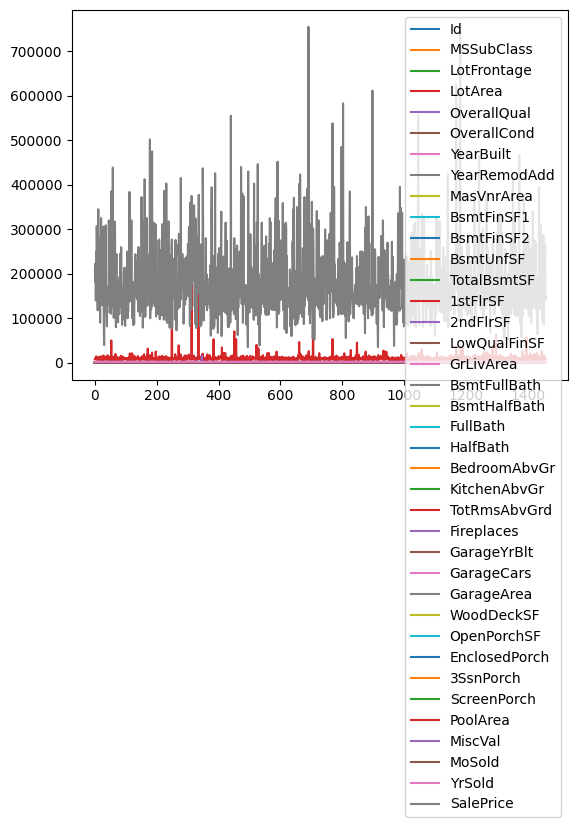

In [11]:
data.plot()

<Axes: >

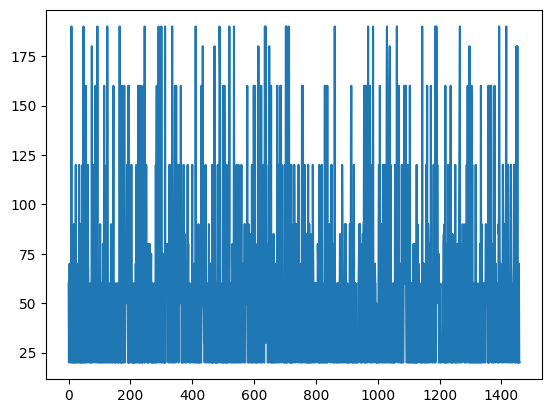

In [13]:
data['MSSubClass'].plot()

In [14]:
data = pd.read_csv("./home-data-for-ml-course/train.csv", index_col = "Id")

In [15]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 2. Feature Selections

In [19]:
features = ["LotArea", "YearBuilt", "1stFlrSF", '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

## 3. Splitting dataset into X and y
### 3.1 dataset $\rightarrow$ X, y

In [27]:
X = data[features]
y = data['SalePrice']

In [25]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


In [28]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

### 3.2 X, y $\rightarrow$ X_train, y_train, X_valid, y_valid

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [31]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 653.6 kB/s eta 0:00:13
      --------------------------------------- 0.1/8.3 MB 1.2 MB/s eta 0:00:07
     - -------------------------------------- 0.3/8.3 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.3 MB 2.8 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/8.3 MB 3.6 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/8.3 MB 3.6 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/8.3 MB 4.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.3 MB 4.4 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.3 MB 4.7 MB/s eta 0:00:02
     ---------- ----------------------------- 2.2/8.3 MB 4.8 MB/s eta 0:00:02
     ------------ --------------------------- 2.6/8.3 MB 4.9 MB/s eta 0:00:02
     ------------- -------------------------- 2.8/8.3 MB 5.2 MB/s eta

In [34]:
X_train.shape

(1168, 7)

In [35]:
X_valid.shape

(292, 7)

## 4. Training Machine Learning Model 

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)

In [38]:
#Fit training data into model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [39]:
y_preds = dt_model.predict(X_valid.head())

In [41]:
y_preds

array([335000., 140200., 119000., 207500., 112000.])

In [42]:
y_valid.head()

Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64

In [43]:
pd.DataFrame({'y': y_valid.head(), 'y_preds': y_preds})

,y,y_preds
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0


In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [46]:
rf_val_preds = rf_model.predict(X_valid)

In [47]:
rf_val_preds[:5]

array([271690., 155039., 122024., 188915.,  91147.])

### Predict with a new input


In [48]:
X_valid.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
530,32668,1957,2515,0,3,4,9
492,9490,1941,958,620,1,3,5
460,7015,1950,979,224,1,3,5
280,10005,1977,1156,866,2,4,8
656,1680,1971,525,567,1,3,6


In [50]:
rf_model.predict([[6969, 2021, 1000, 800, 4, 5, 8]])

C:\Users\Nghia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([206158.4])

### 5. Model Evaluation